In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Groceries.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### EDA

In [3]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [4]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [5]:
df.shape

(38765, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 605.8+ KB


In [7]:
df.Date = pd.to_datetime(df.Date) 

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [9]:
df['Year'] = df.Date.apply(lambda x : x.year)

In [10]:
df['Month'] = df.Date.apply(lambda x : x.month)
df['Days of Week'] = df.Date.apply(lambda x : x.dayofweek)

In [11]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
Year                  2
Month                12
Days of Week          7
dtype: int64

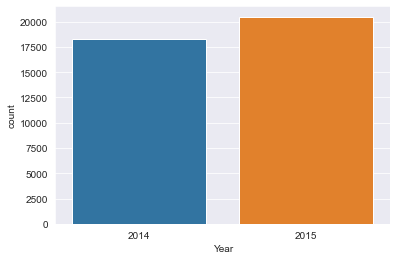

In [12]:
sns.countplot(df.Year)
plt.show()

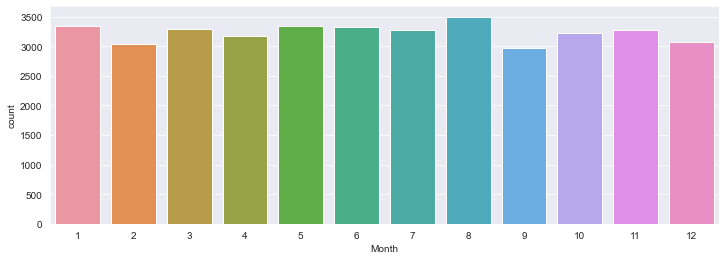

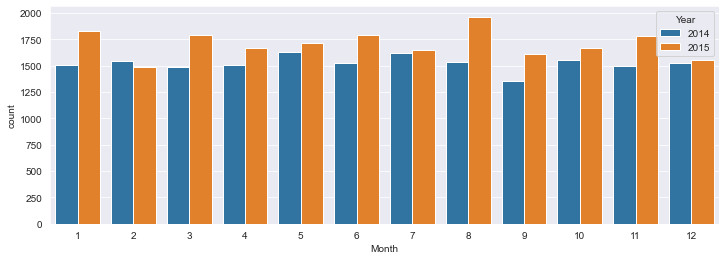

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(df.Month)
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df.Month,hue=df.Year)
plt.show()

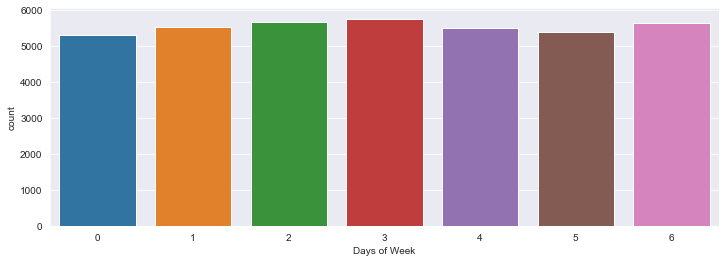

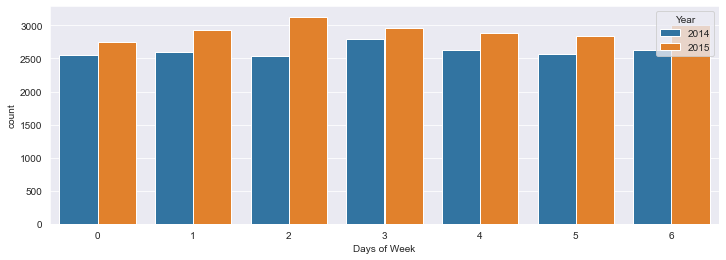

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(df['Days of Week'])
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df['Days of Week'],hue=df.Year)
plt.show()

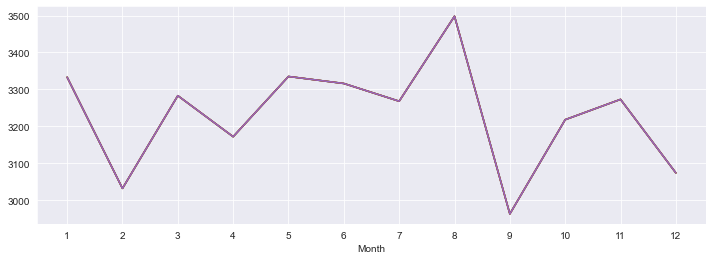

In [15]:
df.groupby('Month').count().plot(legend=False,figsize=(12,4))
plt.xticks([i for i in range(1,13)])
plt.show()

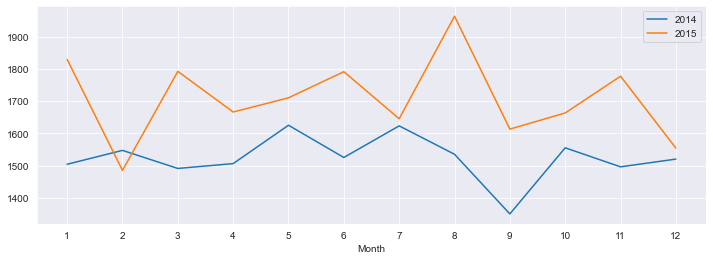

In [16]:
df[df['Year']==2014].groupby('Month').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Month').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()
plt.show()

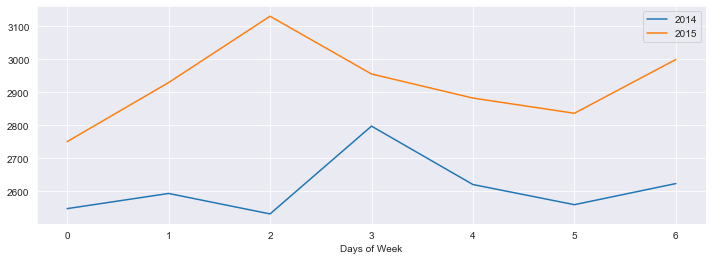

In [17]:
df[df['Year']==2014].groupby('Days of Week').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Days of Week').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(0,7)])
plt.legend()
plt.show()

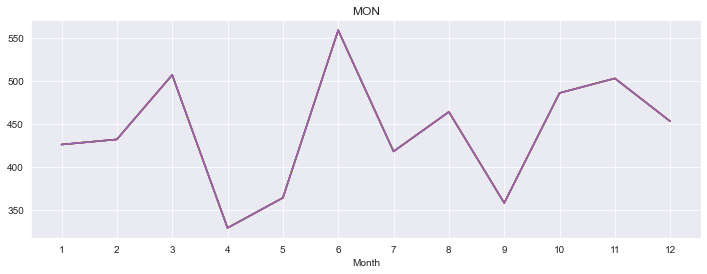

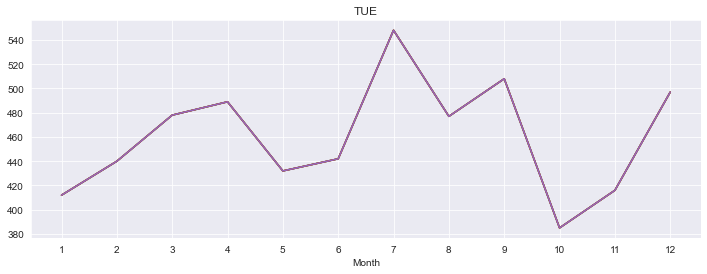

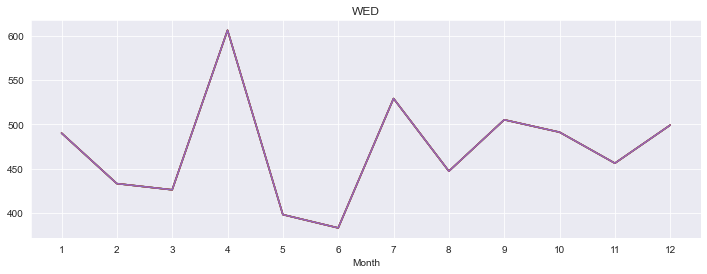

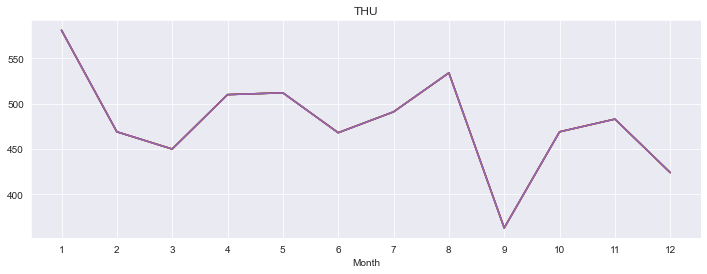

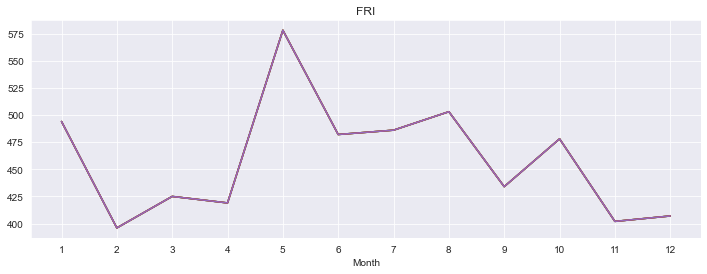

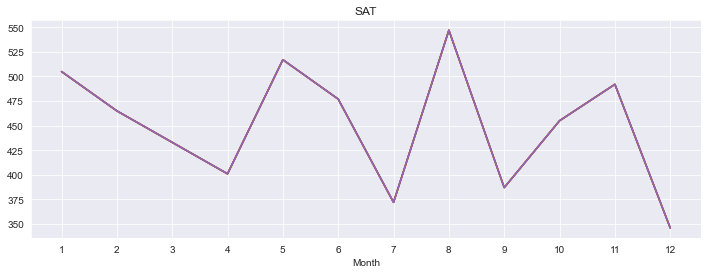

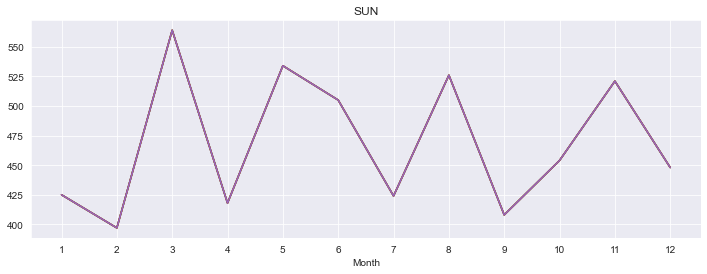

In [18]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
for i in range(0,7):
    df[df['Days of Week']==i].groupby('Month').count().plot(legend=False,figsize=(12,4))
    plt.xticks([i for i in range(1,13)])
    plt.title(days[i].upper())
    plt.show()

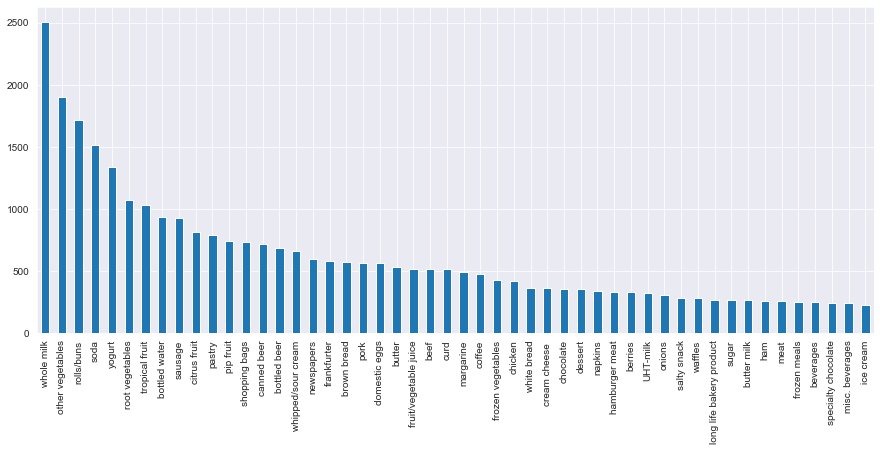

In [19]:
df.itemDescription.value_counts().head(50).plot(kind='bar',figsize=(15,6))
plt.show()

In [20]:
pd.DataFrame(df.itemDescription.value_counts()/len(df)).head()

,itemDescription
whole milk,0.064543
other vegetables,0.048962
rolls/buns,0.044267
soda,0.039056
yogurt,0.034412


### Feature Engineering

In [21]:
dummies = pd.get_dummies(df.itemDescription)
dummies.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df = df.join(dummies)
df.head()

,Member_number,Date,itemDescription,Year,Month,Days of Week,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,tropical fruit,2015,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,whole milk,2015,5,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,pip fruit,2015,9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,other vegetables,2015,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,whole milk,2015,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
item = df.itemDescription.unique()
print(len(item))

167


In [24]:
df = df.groupby(['Member_number','Date'])[item[:]].sum()
df.head(10)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   
1001          2014-07-02               0           1          0   
              2014-12-12               0           1          0   
              2015-01-20               0           0          0   
              2015-02-05               0           0          0   
              2015-04-14               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   
1001          2014-07-02                 0           1           0   
              2014-12-12                 0           0           0   
              2015-01-20                 0           0           0   
              2015-02-05                 0           0           0   
              2015-04-14                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   
1001          2014-07-02             0     0            0        0  ...   
              2014-12-12             0     0            0        0  ...   
              2015-01-20             0     0            1        0  ...   
              2015-02-05             0     0            1        0  ...   
              2015-04-14             0     1            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   
1001          2014-07-02               0     0    0               0   
              2014-12-12               0     0    0               0   
              2015-01-20               0     0    0               0   
              2015-02-05               0     0    0               0   
              2015-04-14               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27                     0               0            0   
              2015-07-24                     0               0            0   
              2015-11-25                     0               0            0   
1001          2014-07-02                     0               0           

In [25]:
df = df.reset_index()

In [26]:
df.head(10)

,Member_number,Date,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,1000,2014-06-24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,2015-03-15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,2015-05-27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,2015-07-24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,2015-11-25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1001,2014-07-02,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1001,2014-12-12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1001,2015-01-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1001,2015-02-05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1001,2015-04-14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df = df.drop(['Member_number','Date'],axis=1)

In [28]:
df.head(10)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Converting true values to its columns names

temp = df.copy()

for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]>0:
            temp.loc[i,j]=j
temp.head(10)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,whole milk,0,0,rolls/buns,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,frankfurter,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,frankfurter,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,beef,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
temp = temp.values
transactions = []
for i in range(14693):
    x=[]
    for j in range(167):
        if temp[i,j]!=0:
            x.append(temp[i,j])
    transactions.append(x)
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['whole milk', 'butter'],
 ['other vegetables', 'frozen vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['rolls/buns', 'sausage'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['whole milk', 'root vegetables', 'pastry'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['other vegetables', 'hygiene articles'],
 

### Model Building

In [31]:
from apyori import apriori

In [32]:
results = apriori(transactions,min_support=0.0003,min_confidence=0.02,min_lift=3,min_length=2,target='rules')

In [33]:
results = list(results)

In [34]:
len(results)

33

In [35]:
results[0]

RelationRecord(items=frozenset({'specialty chocolate', 'frozen fish'}), support=0.0003402981011365957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen fish'}), items_add=frozenset({'specialty chocolate'}), confidence=0.04950495049504951, lift=3.16250538097288), OrderedStatistic(items_base=frozenset({'specialty chocolate'}), items_add=frozenset({'frozen fish'}), confidence=0.021739130434782608, lift=3.16250538097288)])

In [36]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDF = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

#### Apriori

In [37]:
resultsinDF

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,frozen fish,specialty chocolate,0.000340,0.049505,3.162505
1,liver loaf,fruit/vegetable juice,0.000408,0.120000,3.533387
2,ham,pickled vegetables,0.000476,0.027559,3.091032
3,misc. beverages,salt,0.000340,0.021645,3.655521
4,misc. beverages,spread cheese,0.000340,0.021645,3.245207
5,seasonal products,soups,0.000340,0.048544,15.175584
6,spread cheese,sugar,0.000408,0.061224,3.420424
7,whole milk,beef,0.000476,0.102941,3.018991
8,butter,sausage,0.000340,0.208333,3.462717
9,hard cheese,whole milk,0.000340,0.023256,3.285555


#### Eclat

In [38]:
resultsinDF.sort_values(by='Support',ascending=False).drop(['Confidence','Lift'],axis=1).set_index(['Left Hand Side','Right Hand Side'])

Support
Left Hand Side    Right Hand Side                
ham               pickled vegetables     0.000476
whole milk        beef                   0.000476
yogurt            sausage                0.000476
                  sausage                0.000408
citrus fruit      yogurt                 0.000408
pork              yogurt                 0.000408
liver loaf        fruit/vegetable juice  0.000408
spread cheese     sugar                  0.000408
sausage           canned beer            0.000408
frozen fish       specialty chocolate    0.000340
hard cheese       other vegetables       0.000340
root vegetables   shopping bags          0.000340
onions            yogurt                 0.000340
newspapers        pastry                 0.000340
pastry            sausage                0.000340
other vegetables  waffles                0.000340
soft cheese       other vegetables       0.000340
other vegetables  whole milk             0.000340
curd              sausage                0.000340
chewing gum       yogurt                 0.000340
soda              frankfurter            0.000340
rolls/buns        frankfurter            0.000340
hygiene articles  whole milk             0.000340
frozen vegetables sausage                0.000340
butter milk       yogurt                 0.000340
frankfurter       butter                 0.000340
canned beer       frozen vegetables      0.000340
hard cheese       whole milk             0.000340
butter            sausage                0.000340
seasonal products soups                  0.000340
misc. beverages   spread cheese          0.000340
                  salt                   0.000340
rolls/buns        yogurt                 0.000340